In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras import datasets,models,layers
import matplotlib.pyplot as plt

In [4]:
from PIL import Image
import os
import numpy as np

In [45]:
def load_data(folder,target_size=(32, 32),num_channels=3):
    images = []
    labels = []
    class_labels = os.listdir(folder)  
    for class_label in class_labels:
        class_folder = os.path.join(folder, class_label)
        for filename in os.listdir(class_folder):
            img_path = os.path.join(class_folder, filename)
            img = Image.open(img_path)
            if img is not None:
                img = img.resize(target_size)  
                img = np.array(img)
                if len(img.shape) == 2:  
                    img = np.expand_dims(img, axis=-1)
                    img = np.repeat(img, num_channels, axis=-1)
                images.append(np.array(img))
                labels.append(class_label)
    return images, labels


train_folder = "./Alzheimer_s Dataset/train"
test_folder = "./Alzheimer_s Dataset/test"

train_images, train_labels = load_data(train_folder)

test_images, test_labels = load_data(test_folder)

In [46]:
train_images = np.array(train_images)
test_images = np.array(test_images)
train_images, test_images = train_images / 255.0, test_images / 255.0

In [16]:
import random

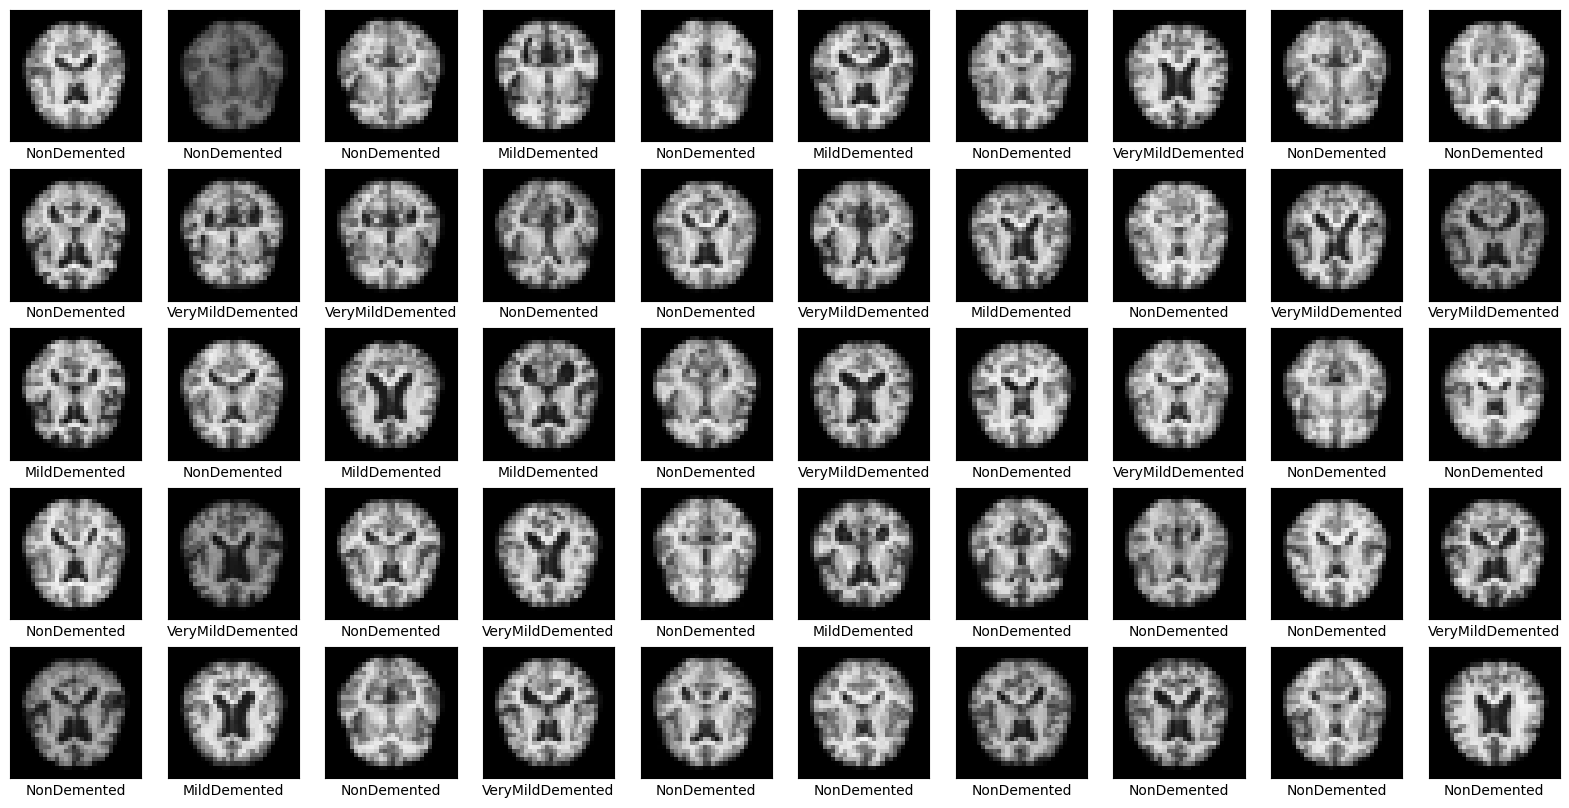

In [47]:
class_names = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

random_indices = random.sample(range(len(train_images)), 50)

plt.figure(figsize=(20, 10))  
for i, idx in enumerate(random_indices):
    plt.subplot(5, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[idx])
    plt.xlabel(train_labels[idx]) 
plt.show()

In [48]:
print(len(train_images))
print(len(test_images))

5121
1279


In [49]:
def create_model():
    cnnmodel = models.Sequential()
    cnnmodel.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
    cnnmodel.add(layers.MaxPooling2D((2, 2)))
    cnnmodel.add(layers.Conv2D(64,(3,3),activation='relu'))
    cnnmodel.add(layers.MaxPooling2D((2,2)))
    cnnmodel.add(layers.Conv2D(128,(3,3),activation='relu'))
    cnnmodel.add(layers.MaxPooling2D((2, 2)))
    return cnnmodel

In [50]:
model = create_model()

In [51]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 2, 2, 128)        

In [52]:
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

In [53]:
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(4,activation='softmax'))

In [54]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 2, 2, 128)        

In [55]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 2, 2, 128)        

In [41]:
from sklearn.preprocessing import LabelEncoder

In [59]:
label_encoder = LabelEncoder()
label_encoder.fit(class_names)
train_labels_numeric = label_encoder.transform(train_labels)
label_mapping = dict(zip(class_names, label_encoder.transform(class_names)))
test_labels_numeric = label_encoder.transform(test_labels)
print("Class Name to Numeric Label Mapping:")
print(label_mapping)

Class Name to Numeric Label Mapping:
{'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}


In [60]:
history = model.fit(train_images, train_labels_numeric, epochs=10, 
                    validation_data=(test_images, test_labels_numeric))

Epoch 1/10
161/161 [==============================] - 4s 26ms/step - loss: 0.9519 - accuracy: 0.5337 - val_loss: 0.9270 - val_accuracy: 0.5520
Epoch 2/10
161/161 [==============================] - 4s 25ms/step - loss: 0.9083 - accuracy: 0.5593 - val_loss: 0.9175 - val_accuracy: 0.5364
Epoch 3/10
161/161 [==============================] - 4s 25ms/step - loss: 0.8975 - accuracy: 0.5751 - val_loss: 0.9320 - val_accuracy: 0.5371
Epoch 4/10
161/161 [==============================] - 4s 24ms/step - loss: 0.8447 - accuracy: 0.5911 - val_loss: 0.9175 - val_accuracy: 0.5645
Epoch 5/10
161/161 [==============================] - 4s 22ms/step - loss: 0.8807 - accuracy: 0.5774 - val_loss: 0.9616 - val_accuracy: 0.5293
Epoch 6/10
161/161 [==============================] - 4s 26ms/step - loss: 0.7878 - accuracy: 0.6219 - val_loss: 0.9609 - val_accuracy: 0.5395
Epoch 7/10
161/161 [==============================] - 4s 25ms/step - loss: 0.7129 - accuracy: 0.6653 - val_loss: 0.9086 - val_accuracy: 0.5645

40/40 - 0s - loss: 0.9606 - accuracy: 0.5582 - 444ms/epoch - 11ms/step
0.5582486391067505


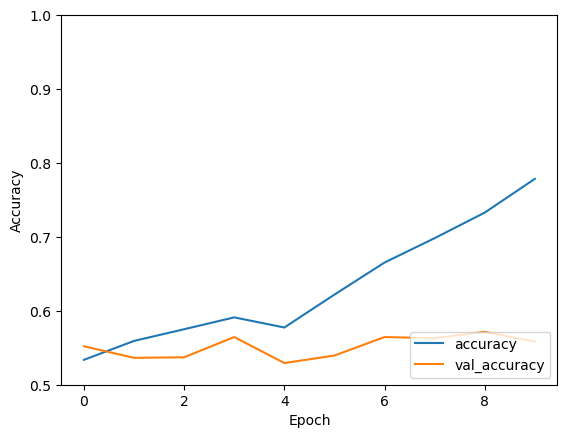

In [62]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels_numeric, verbose=2)
print(test_acc)

1/1 [==============================] - 0s 63ms/step


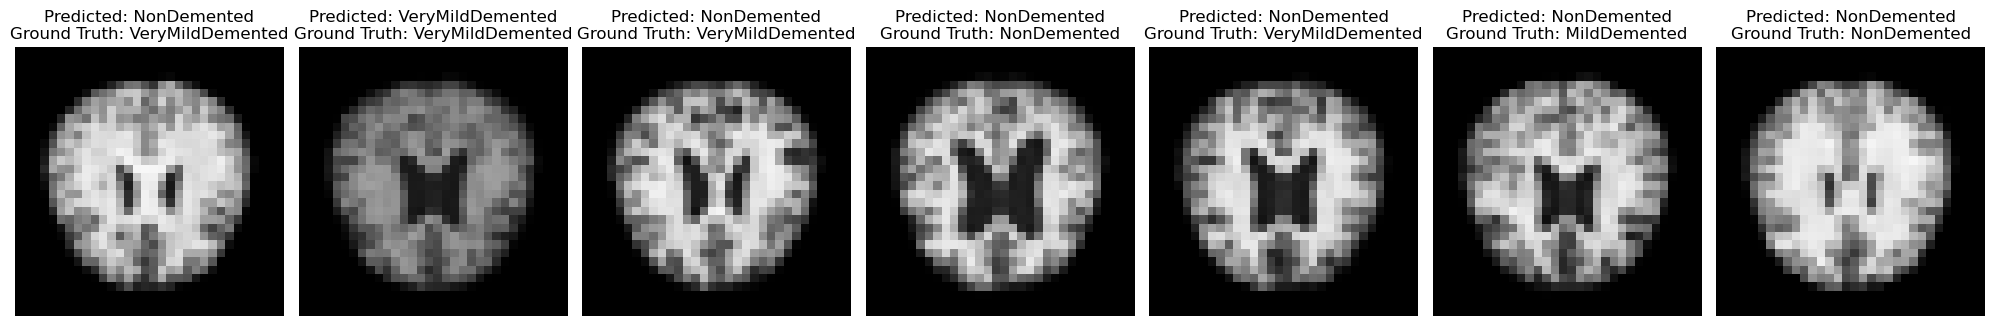

In [65]:
selected_indices = np.random.choice(len(test_images), 7, replace=False)
selected_images = np.array(test_images)[selected_indices]
selected_labels = np.array(test_labels_numeric)[selected_indices]

predictions = model.predict(selected_images)
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(20, 10))
for i in range(7):
    plt.subplot(1, 7, i + 1)
    plt.imshow(selected_images[i])
    plt.title(f'Predicted: {class_names[predicted_labels[i]]}\nGround Truth: {class_names[selected_labels[i]]}')
    plt.axis('off')

plt.tight_layout()
plt.show()